In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days = 365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG',
                   start = start_date,
                   end = end_date,
                   progress = False)

data['Date'] = data.index
date = data[['Date',
             'Open',
             'High',
             'Low',
             'Close',
             'Adj Close',
             'Volume']]
data.reset_index(drop = True, inplace = True)
print(data.tail())

           Open        High         Low       Close   Adj Close    Volume  \
246  178.779999  179.910004  174.539993  175.059998  175.059998  14928400   
247  176.520004  177.304001  175.199997  176.330002  176.330002  11400600   
248  175.740005  178.509995  175.679993  178.020004  178.020004  15655300   
249  176.809998  178.229996  176.259995  177.399994  177.399994  15023800   
250  176.690002  176.690002  173.229996  173.559998  173.559998  18826300   

          Date  
246 2024-05-23  
247 2024-05-24  
248 2024-05-28  
249 2024-05-29  
250 2024-05-30  


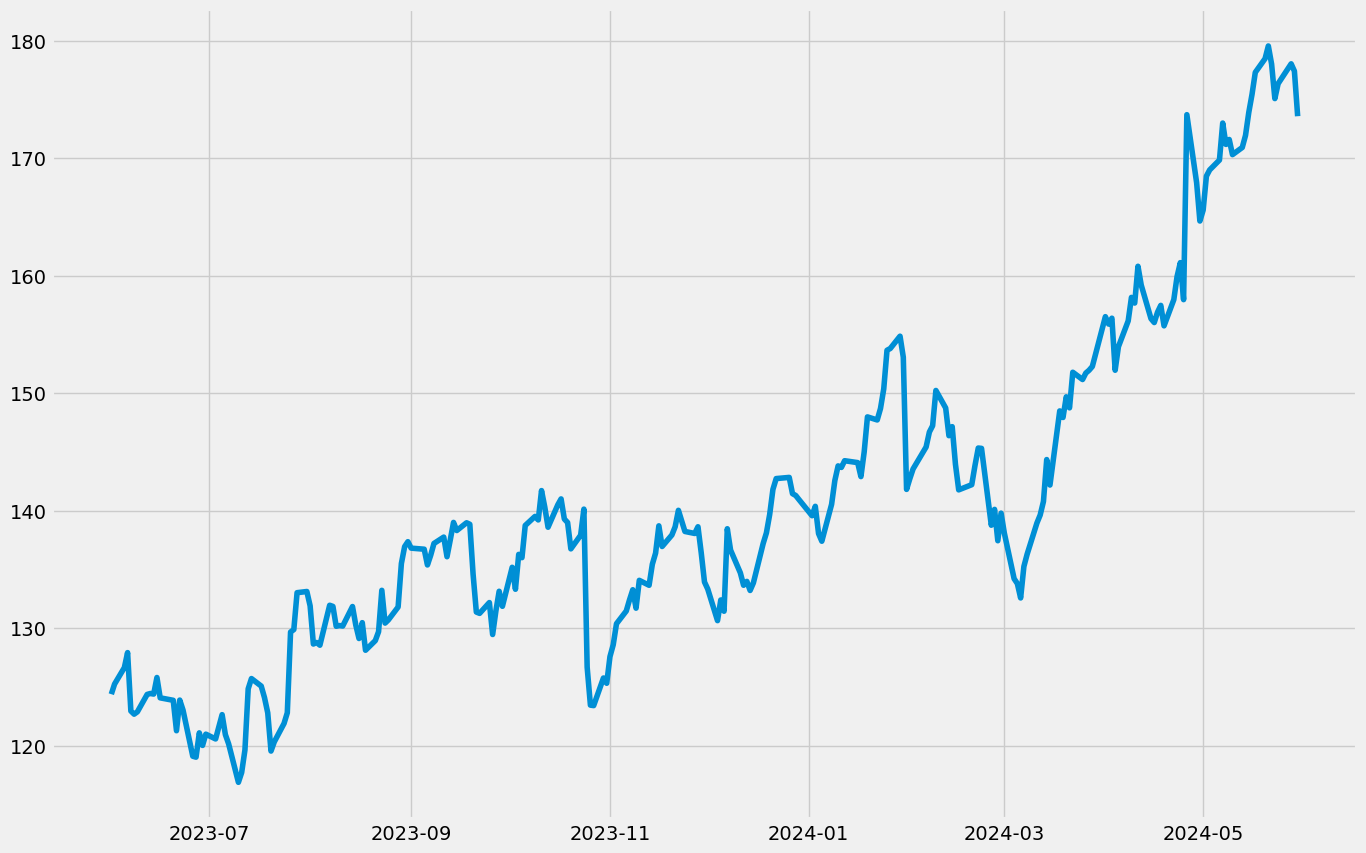

In [2]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize = (15, 10))
plt.plot(data['Date'], data['Close'])

<Figure size 640x480 with 0 Axes>

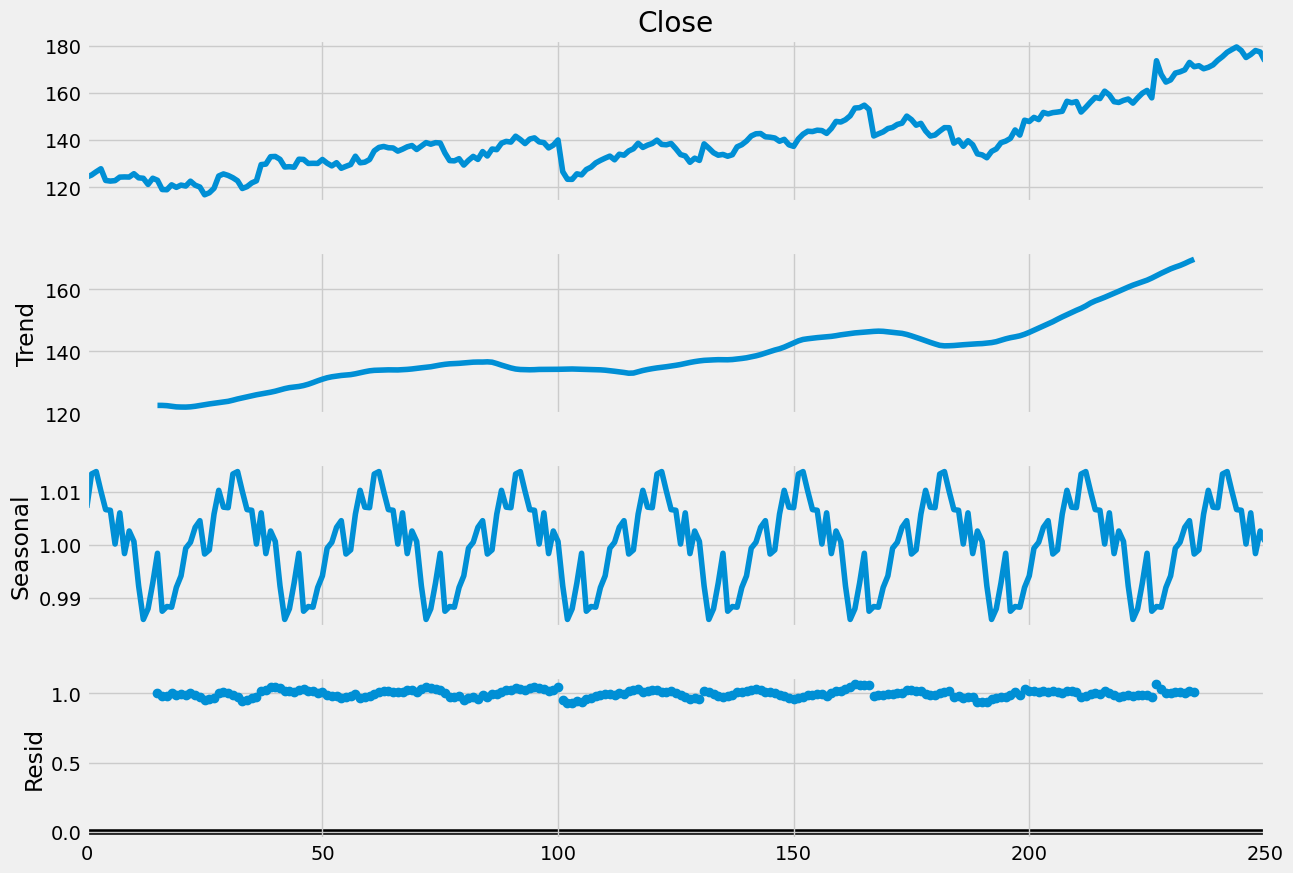

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', 
                            period = 30)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

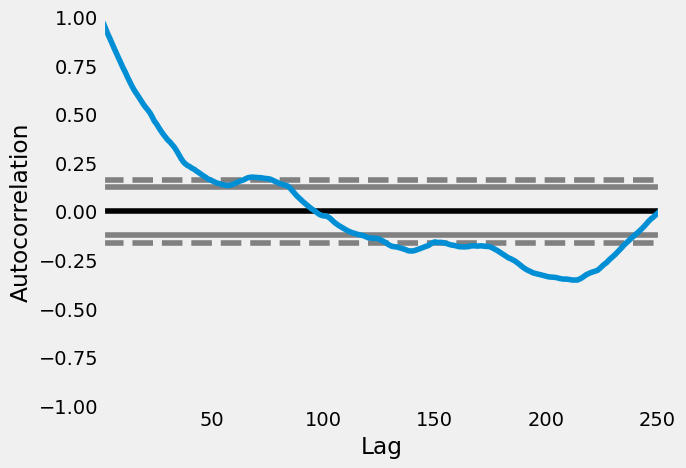

In [4]:
pd.plotting.autocorrelation_plot(data['Close'])

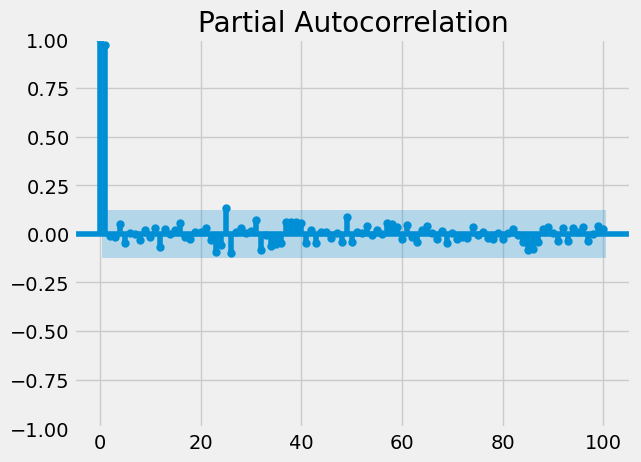

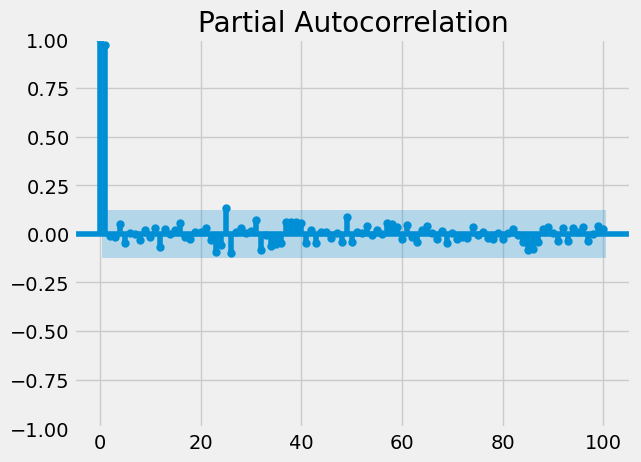

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data['Close'],
         lags = 100)

In [6]:
p, d, q = 6, 1, 2

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], 
              order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(6, 1, 2)   Log Likelihood                -579.592
Date:                Fri, 31 May 2024   AIC                           1177.183
Time:                        10:54:45   BIC                           1208.876
Sample:                             0   HQIC                          1189.939
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6112      0.064     -9.487      0.000      -0.737      -0.485
ar.L2         -0.9756      0.097    -10.016      0.000      -1.167      -0.785
ar.L3         -0.1360      0.125     -1.091      0.2

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      124.369938
2      125.161616
3      126.497969
4      127.727546
          ...    
246    176.539743
247    175.071164
248    177.696632
249    177.431306
250    176.378771
Name: predicted_mean, Length: 251, dtype: float64


In [8]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(6, 1, 2)x(6, 1, 2, 12)   Log Likelihood                -566.927
Date:                            Fri, 31 May 2024   AIC                           1167.855
Time:                                    10:56:16   BIC                           1226.883
Sample:                                         0   HQIC                          1191.644
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8386      0.524     -1.601      0.109      -1.865       0.188
ar.L2          0.0958      0.543   

In [9]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    174.172752
252    174.333176
253    174.212891
254    175.782699
255    176.697655
256    175.996942
257    174.307027
258    174.528184
259    174.873602
260    174.540903
261    174.586739
Name: predicted_mean, dtype: float64


<Axes: >

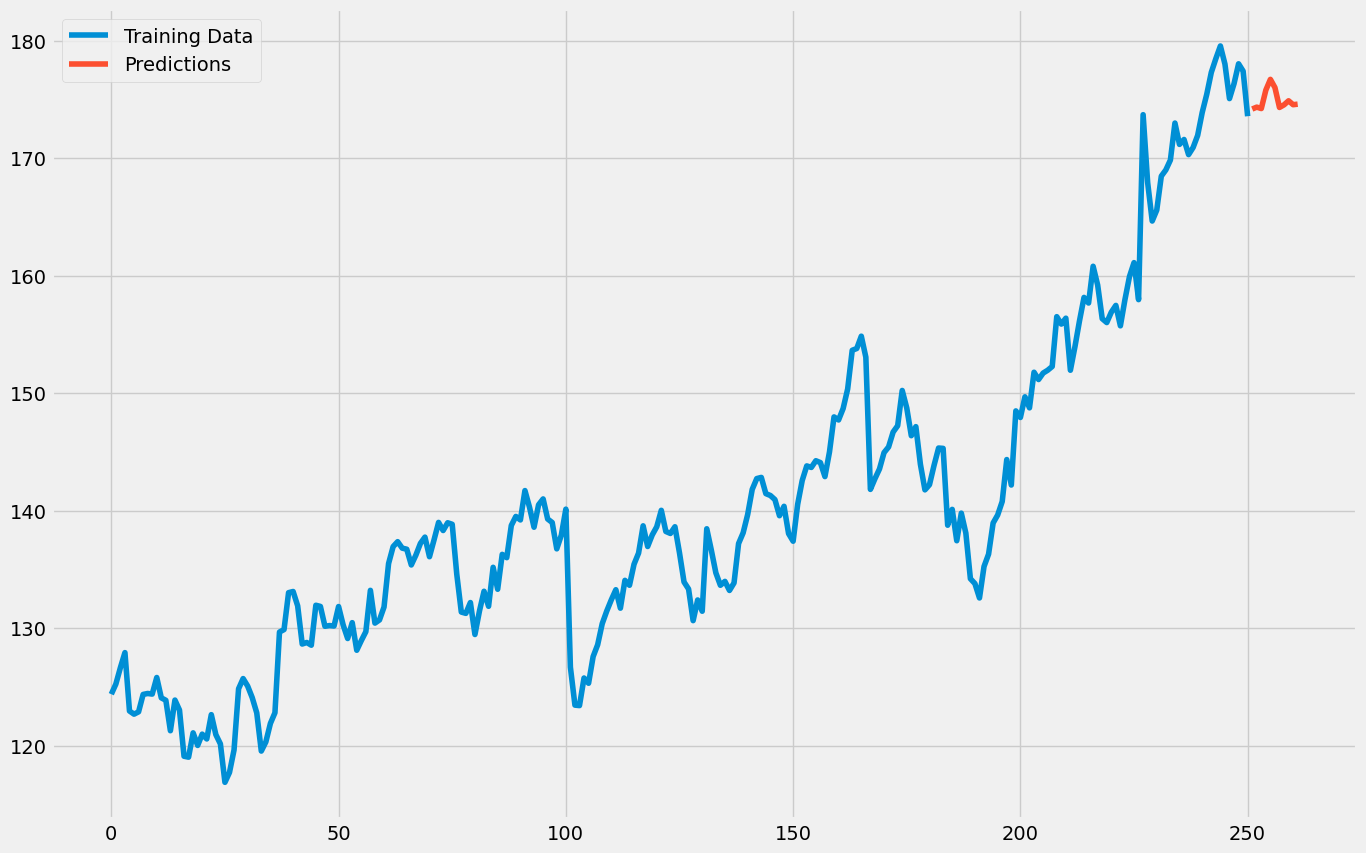

In [10]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")